# Project: Investigate a Dataset (No-show appointments in Brazil)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### This dataset contains a 110.527 medical appointments in Brazil and 14 associated variables (characteristics), Those variables are:

#### 01 - PatientId:

Identification of a patient.

#### 02 - AppointmentID:

Identification of each appointment.

#### 03 - Gender:

The gender of patient:Male or Female.

#### 04 - ScheduledDay:

The day of the actuall appointment, when they have to visit the doctor.

#### 05 - AppointmentDay:

The day someone registered the appointment, this is before appointment.

#### 06 - Age:

How old is the patient.

#### 07 - Neighbourhood:

Where the appointment takes place.

#### 08 - Scholarship:

States if the patient’s family participates in a social welfare program of the government, providing financial aid to poor families. more details here:https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

#### 09 - Hipertension:

The patient have hipertension or not.

#### 10 - Diabetes:

The patient have diabetes or not.
 
#### 11 - Alcoholism:

Is the patient addicted to alcohol?

#### 12 - Handcap:

Does the patient have handcap ?

#### 13 - SMS_received:

Is the message sent to the patient for the appointment?

#### 14 - No-show:

Did the patient didnt show-up? No:mean the patient show-up, Yes:mean the patient didnt show-up.

### Research Questions

Here is what i want to get from this data in 3 questions:

#### Q1.Who has the most cases of male or female cases in diabetes, hipertension, alcoholism and handcap?

#### Q2.Who is have both  of 2 most disease cases (diabetes, hipertension) male or female?

#### Q3.Did sms messages affect attendance?

#### Q4.What is the ages ranged and their count?

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
#Here reading the dataset and display the head of the dataset.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
 #Here display the shape of dataset to see how many rows and columns we have.
df.shape

(110527, 14)

In [4]:
#take a look for datatypes and missing values
#we didnt have any missing value, but there is some data types need to change.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#know the value distribution of each column.
df.describe() 

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#as showen there is no duplicated value
df.duplicated().sum()

0

## What I'm going to do in the next step ( Data Cleaning ) :

1-The dataset didnt have any missing value so no need to compensation it, also didnt have duplicated value may after drop some columns well have some duplicated so i will handle it by drop it and keep the first as a unique.

2-There is some datatypes need to change such as 'ScheduledDay' and 'AppointmentDay' to datetime type, 'Scholarship', 'Hipertension', 'Alcoholism', 'Diabetes', 'SMS_received' need to change to boolean because 0 and 1 value not clear and 1 mean True and 0 mean False so change it well be more clear also 'No-show' need to change to boolean because there is yes and no, value no mean the patient show-up and yes mean the patient didnt show-up, the 'Handcap' has some different value as shown max = 4 we well see it later and change it to boolean.

3-In distribution( df.describe() ) there some value need to check first and see if it need to drop or change the value of it like 'Age' min = -1 and max = 115 , 'Handcap' have max = 4.

4-There is some columns need to drop because well not help me to my analysis 'PatientId' and 'AppointmentID'.

5-The 'No-show' well rename to 'patient_attendance' and the values well be (True) mean the patient show-up, (False) the patient didnt show-up.

6-All colmuns has Capital letter so we make al the letters small to be easy to call.

### Data Cleaning 

In number 4 i explaind why im going to drop these 2 columns
###### (There is some columns need to drop because well not help me to my analysis 'PatientId' and 'AppointmentID'.)

In [7]:
# im going to drop 2 columns 'PatientId' and 'AppointmentID'
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In number 5 i explaind why im going to rename this column
###### (The 'No-show' well rename to 'patient_attendance' and the values well be (True) mean the patient show-up, (False) the patient didnt show-up.)

In [8]:
# here im going to rename 'No-show' column to 'patient_attendance'
df.rename(columns={'No-show': 'patient_attendance'}, inplace=True)

In number 6 i explaind why im going to change columns from uppercase to lowercase
###### (All colmuns has Capital letter so we make all the letters small to be easy to call.)

In [9]:
# im going to change columns from uppercase to lowercase
df.columns = map(str.lower, df.columns)

As i explained in number 1 after dropped the 2 columns 'PatientId' and 'AppointmentID' i going to chek if there is any duplicated values or not and handle it by drop it and keep the first
###### (may after drop some columns well have some duplicated so i will handle it by drop it and keep the first as a unique.)

In [10]:
# sum the duplicated values
df.duplicated().sum()

635

As shown there in the last cell a 635 duplicated values so im going to drop it and keep first of it.

In [11]:
# here drop the duplicated values and keep first, it considers first value as unique and rest of the same values as duplicate.
df.drop_duplicates(subset=None, keep='first', inplace=True)

In number 2 i want to change data type for both columns 'ScheduledDay' and 'AppointmentDay' to datetime type
###### (There is some datatypes need to change such as 'ScheduledDay' and 'AppointmentDay' to datetime type.)

In [12]:
#First going to change type of 'scheduledday' to datetime
df['scheduledday']=pd.to_datetime(df['scheduledday'], format='%Y-%m-%dT%H:%M:%SZ')
df['scheduledday']

0        2016-04-29 18:38:08
1        2016-04-29 16:08:27
2        2016-04-29 16:19:04
3        2016-04-29 17:29:31
4        2016-04-29 16:07:23
                 ...        
110522   2016-05-03 09:15:35
110523   2016-05-03 07:27:33
110524   2016-04-27 16:03:52
110525   2016-04-27 15:09:23
110526   2016-04-27 13:30:56
Name: scheduledday, Length: 109892, dtype: datetime64[ns]

In [13]:
#Second going to change type of 'appointmentday' to datetime
df['appointmentday']=pd.to_datetime(df['appointmentday'], format='%Y-%m-%dT%H:%M:%SZ')
df['appointmentday']

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
            ...    
110522   2016-06-07
110523   2016-06-07
110524   2016-06-07
110525   2016-06-07
110526   2016-06-07
Name: appointmentday, Length: 109892, dtype: datetime64[ns]

So the column 'appointmentday' has the time like 00:00:00 so becuase of that the time well not showen

After change the first 2 columns types so i going to second step of number 2 and its change these columns 'Scholarship', 'Hipertension', 'Alcoholism', 'Diabetes', 'SMS_received' to boolean

###### ('Scholarship', 'Hipertension', 'Alcoholism', 'Diabetes', 'SMS_received' need to change to boolean because 0 and 1 value not clear and 1 mean True and 0 mean False so change it well be more clear.)

In [14]:
#first im going to count value of one of the columns and count it after change the type of it
df['scholarship'].value_counts()

0    99091
1    10801
Name: scholarship, dtype: int64

In [15]:
#Here i will convert column 'scholarship' to boolean 
df['scholarship'] = df['scholarship'].astype('bool')

In [16]:
#As shown here the count of 'scholarship' before and after convert is the same
df['scholarship'].value_counts()

False    99091
True     10801
Name: scholarship, dtype: int64

In [17]:
#so i will convert the rest columns datatypes
df['hipertension'] = df['hipertension'].astype('bool')

In [18]:
df['alcoholism'] = df['alcoholism'].astype('bool')

In [19]:
df['diabetes'] = df['diabetes'].astype('bool')

In [20]:
df['sms_received'] = df['sms_received'].astype('bool')

In [21]:
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,patient_attendance
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,No


After change the second step of number 2 to boolean now i well change 'handcap' to boolean also

###### (the 'Handcap' has some different value as shown max = 4 we well see it later and change it to boolean.)

In [22]:
#check the handcap values
df['handcap'].value_counts()

0    107673
1      2023
2       182
3        11
4         3
Name: handcap, dtype: int64

0 mean no handcap, 1-4 mean have handcap so lets convert it to boolean

In [23]:
#here the 1-4 well be true and 0 well be false
df['handcap'] = df['handcap'].astype('bool')

In [24]:
df['handcap'].value_counts()

False    107673
True       2219
Name: handcap, dtype: int64

After convert 'handcap' to boolean i will sum in my calculator to check if the count of 1-4 is the same (1=2023,2=182,3=11,4=3) so 2023+182+11+3=2219 , the count still the same

after change all the columns mention in number 2 there is still 1 column 'No-show' need to convert to boolean as i mention in number 5 above i changed the name of the column to 'patient_attendance'
But i will change the values to be (True) mean the patient show-up, (False) the patient didnt show-up


###### (also 'No-show' need to change to boolean because there is yes and no, value no mean the patient show-up and yes mean the patient didnt show-up)

In [25]:
#first display the counts of value
df['patient_attendance'].value_counts()

No     87794
Yes    22098
Name: patient_attendance, dtype: int64

In [26]:
#second change the value 'No' to 1 and 'Yes' to 0 to compelete number 5 step
df['patient_attendance'].replace({'No': 1, 'Yes': 0}, inplace = True)

In [27]:
df['patient_attendance'] = df['patient_attendance'].astype('bool')

In [28]:
# after change it to boolean the count of values well be the same
df['patient_attendance'].value_counts()

True     87794
False    22098
Name: patient_attendance, dtype: int64

The last step number 3 after distribution( df.describe() ) there is some values need to check as i mention but i handle the max of 'handcap' and convert it to boolean so still 2 more step only.

###### (In distribution( df.describe() ) there some value need to check first and see if it need to drop or change the value of it like 'Age' min = -1 and max = 115 , 'Handcap' have max = 4.)

In [29]:
#serach for index of the min of 'age'
df.loc[df['age'] == -1]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,patient_attendance
99832,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,False,False,False,False,False,False,True


In [30]:
#drop it
df.drop([99832], inplace=True)

In [31]:
#search for index of the max of 'age'
df.loc[df['age'] == 115]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,patient_attendance
63912,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,False,False,False,False,True,False,False
68127,F,2016-04-08 14:29:17,2016-05-16,115,ANDORINHAS,False,False,False,False,True,False,False
76284,F,2016-05-30 09:44:51,2016-05-30,115,ANDORINHAS,False,False,False,False,True,False,True
97666,F,2016-05-19 07:57:56,2016-06-03,115,SÃO JOSÉ,False,True,False,False,False,True,True


After find the max of 'age' i think there is 2 diffrient patient so one in ANDORINHAS neighbourhood , second in SÃO JOSÉ neighbourhood

note:first patient have the same disease and neighbourhood becuese of that i mention its the same person.

In [32]:
#after lets see the change i made
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,patient_attendance
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True


In [33]:
#check the shape of the dataset after cleaning
df.shape

(109891, 12)

In [34]:
#check the types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109891 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   gender              109891 non-null  object        
 1   scheduledday        109891 non-null  datetime64[ns]
 2   appointmentday      109891 non-null  datetime64[ns]
 3   age                 109891 non-null  int64         
 4   neighbourhood       109891 non-null  object        
 5   scholarship         109891 non-null  bool          
 6   hipertension        109891 non-null  bool          
 7   diabetes            109891 non-null  bool          
 8   alcoholism          109891 non-null  bool          
 9   handcap             109891 non-null  bool          
 10  sms_received        109891 non-null  bool          
 11  patient_attendance  109891 non-null  bool          
dtypes: bool(7), datetime64[ns](2), int64(1), object(2)
memory usage: 5.8+ MB


In [35]:
#Save the changes in new dataset
df.to_csv('noshow-dataset-cleaned.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis



In [36]:
#reading the cleaned dataset cln mean cleaned
df_cln=pd.read_csv('noshow-dataset-cleaned.csv')
df_cln.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,patient_attendance
0,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,True
1,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,True
2,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62,MATA DA PRAIA,False,False,False,False,False,False,True
3,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True
4,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,True


In [37]:
#see the shape of cleaned dataset
df_cln.shape

(109891, 12)

### Research Question 1 (Who has the most cases of male or female cases in diabetes, hipertension, alcoholism and handcap?)

In [44]:
#count the gender column to see what is the most male or female numbers
df_cln['gender'].value_counts()

F    71416
M    38475
Name: gender, dtype: int64

In [45]:
#group by gender by sum of each case
df_gen_dia = df_cln.groupby('gender', as_index=False).diabetes.sum()
df_gen_hip = df_cln.groupby('gender', as_index=False).hipertension.sum()
df_gen_alc = df_cln.groupby('gender', as_index=False).alcoholism.sum()
df_gen_hcp = df_cln.groupby('gender', as_index=False).handcap.sum()

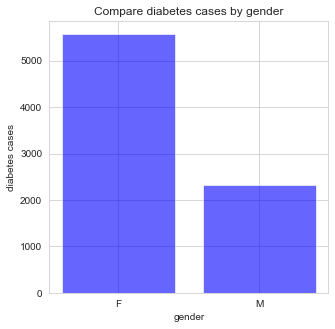

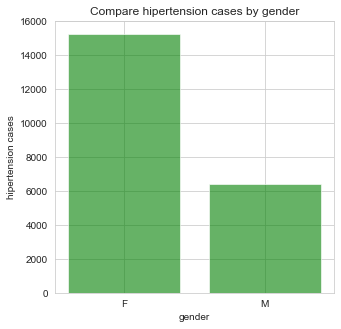

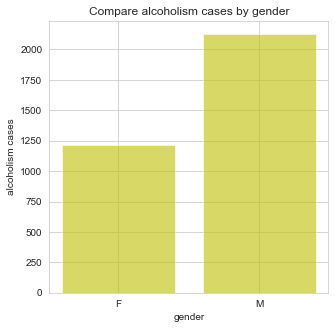

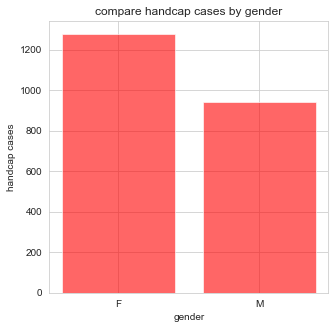

In [46]:
#draw graph for each case to see what is the most male or female

sns.set_style('whitegrid')

plt.subplots(1,1,figsize=(5,5))
plt.bar(df_gen_dia['gender'] , df_gen_dia['diabetes']  ,color='b', alpha=0.6 )
plt.title('Compare diabetes cases by gender')
plt.xlabel('gender')
plt.ylabel('diabetes cases')

plt.subplots(1,1,figsize=(5,5))
plt.bar(df_gen_hip['gender'] , df_gen_hip['hipertension']  , color='g' , alpha=0.6 )
plt.title('Compare hipertension cases by gender')
plt.xlabel('gender')
plt.ylabel('hipertension cases');

plt.subplots(1,1,figsize=(5,5))
plt.bar(df_gen_alc['gender'] , df_gen_alc['alcoholism']  , color='y' , alpha=0.6 )
plt.title('Compare alcoholism cases by gender')
plt.xlabel('gender')
plt.ylabel('alcoholism cases');

plt.subplots(1,1,figsize=(5,5))
plt.bar(df_gen_hcp['gender'] , df_gen_hcp['handcap']  , color ='r' , alpha=0.6 )
plt.title('compare handcap cases by gender')
plt.xlabel('gender')
plt.ylabel('handcap cases');

As the graphs show us female is most in diabetes, hipertension and handcap.

Male is more in alcoholism.

The most disease they have cases in is hipertension and the less one is handcap.

### Q2.Who is have both  of 2 most disease cases (diabetes, hipertension) male or female?

In [47]:
#Here create a dataframe for each male and female who is have diabetes and hipertension 
df_m_dia_hip = df_cln[(df_cln.gender.astype(str) == 'M') & (df_cln.diabetes.astype(bool) == True) & (df_cln.hipertension.astype(bool) == True )]
df_f_dia_hip = df_cln[(df_cln.gender.astype(str) == 'F') & (df_cln.diabetes.astype(bool) == True) & (df_cln.hipertension.astype(bool) == True )] 

#Here make the 2 dataframe created above in 1 dataframe
df_dia_hip = pd.concat([df_f_dia_hip,df_m_dia_hip],ignore_index=True, sort =False)


In [48]:
#check the head of data frame
df_dia_hip.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,patient_attendance
0,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,True
1,F,2016-04-29 07:35:19,2016-04-29 00:00:00,63,SÃO CRISTÓVÃO,False,True,True,False,False,False,True
2,F,2016-04-29 07:35:56,2016-04-29 00:00:00,64,TABUAZEIRO,True,True,True,False,False,False,True
3,F,2016-04-28 13:27:27,2016-04-29 00:00:00,78,SÃO CRISTÓVÃO,False,True,True,False,False,False,False
4,F,2016-04-28 08:51:26,2016-04-29 00:00:00,39,MARUÍPE,False,True,True,False,False,False,True


In [49]:
#check the total of diabetes cases
df_dia_hip.groupby('gender', as_index=False).diabetes.sum()

,gender,diabetes
0,F,4659.0
1,M,1786.0


In [50]:
#check the total of hipertension cases
df_dia_hip.groupby('gender', as_index=False).hipertension.sum()

,gender,hipertension
0,F,4659.0
1,M,1786.0


The total of both cases is the same so i will groupby gender by sum of each cases(becuase the total is same for both) to compare

In [51]:
#groupby gender by sum of diabetes
df_c_d_h = df_dia_hip.groupby('gender', as_index=False).diabetes.sum()

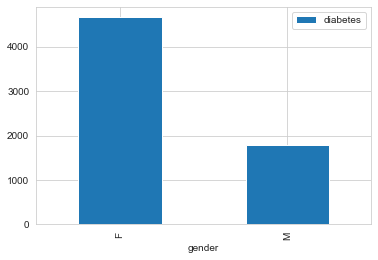

In [52]:
#draw the graph
df_c_d_h.plot(x="gender" , y="diabetes" , kind="bar");

As shown in the graph females have more cases than males.

### Q3.Did sms messages affect attendance?

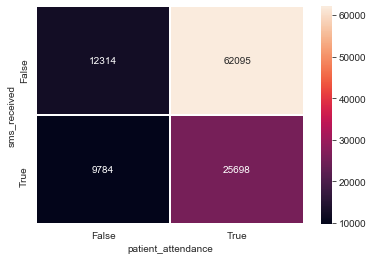

In [54]:
#draw a heatmap to check if sms messages affect on attendance by crosstab both columns

sns.heatmap(pd.crosstab(df_cln.sms_received, df_cln.patient_attendance), annot=True, fmt="d" , linewidths=.5 );

As shown in heatmap sms messages didnt help patient to come because the total paitent how is recive the sms 25698 an they come and 9784 didnt come and the total of didnt recive and come 62095 and didnt come is 12314 so the sms didnt help patient to come. 

### Q4.What is the ages ranged and their count?

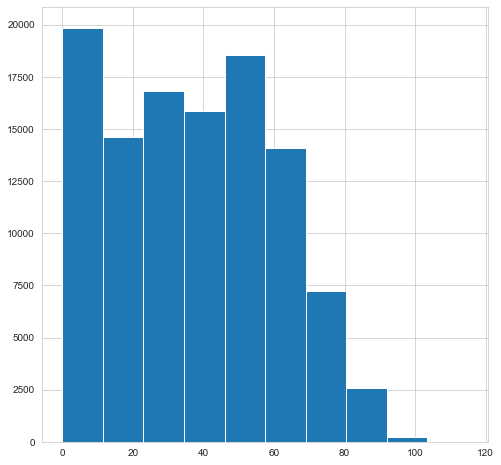

In [57]:
#draw the histogram
df_cln['age'].hist(figsize=(8, 8));

As shown the most count of ranged is for children 0-10 and the lowest is for the oldest people between 90->100.

<a id='conclusions'></a>
## Conclusions

Conclusions
My analysis aim in three questions

1.the graphs show us female is most in diabetes, hipertension and handcap , Male is more in alcoholism, The most disease they have cases in is hipertension and the less one is handcap.

2.As shown in the graph females have more cases than males in whos have both diabetes and hipertension.

3.As shown in heatmap sms messages didnt help patient to come because the total paitent how is recive the sms 25698 an they come and 9784 didnt come and the total of didnt recive and come 62095 and didnt come is 12314 so the sms didnt help patient to come. 

4.As shown in the histogram graph the age of the patinets is between 0 - 115 , most appoitment for children, lowest for old people, between 30-60 the count nearst from each other.

### Limitations

This analysis is limited only on the place of the data was gathring, any tends or finds cannot be the result of we have bigger data dor the world.

This analysis is shown tends and finds.

### Thanks to you for your time.